<a href="https://colab.research.google.com/github/Rahulrathod3624/Rahulrathod3624/blob/main/Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic=pd.read_csv('/content/titanic1.csv')

# New Section

# New Section

In [ ]:
titanic

,Unnamed: 0,title,first_name,last_name,sex,age,family_count,ticket,pclass,fare,embarked,survived,age_group
0,600,Mr,Anthony,Abbing,1,42.000000,0,C.A. 5547,3,7,2,0,0
1,601,Master,Eugene Joseph,Abbott,1,13.000000,2,C.A. 2673,3,20,2,0,1
2,602,Mr,Rossmore Edward,Abbott,1,16.000000,2,C.A. 2673,3,20,2,0,3
3,603,Mrs,Stanton (Rosa Hunt),Abbott,0,35.000000,2,C.A. 2673,3,20,2,1,0
4,605,Mr,Olaus Jorgensen,Abelseth,1,25.000000,0,348122,3,7,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,392,Mrs,Sebastiano (Argenia Genovesi),del Carlo,0,24.000000,1,SC/PARIS 2167,2,27,0,1,3
1305,1264,Mr,Austin Blyler,van Billiard,1,40.500000,2,A/5. 851,3,14,2,0,0
1306,1263,Master,Walter John,van Billiard,1,11.500000,2,A/5. 851,3,14,2,0,1
1307,1262,Master,James William,van Billiard,1,29.881135,2,A/5. 851,3,14,2,0,3


**1.why female has high chances of survaival**

In [ ]:
survival_rate = titanic.groupby('sex')['survived']
survival_rate.mean()

,survived
sex,
0,0.727468
1,0.190985


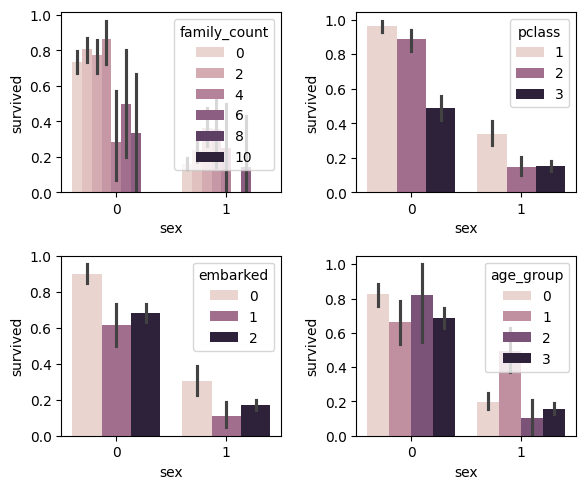

In [ ]:
plt.figure(figsize=(9,7),)
plt.subplot(3,3,1)
sns.barplot(data=titanic,x='sex',y='survived',hue='family_count')

plt.subplot(3,3,2)
sns.barplot(data=titanic,x='sex',y='survived',hue='pclass')

# plt.subplot(3,3,3)
# sns.barplot(data=titanic,x='sex',y='survived',hue='fare') #we do not use the fare column because this have a high variation

plt.subplot(3,3,4)
sns.barplot(data=titanic,x='sex',y='survived',hue='embarked')

plt.subplot(3,3,5)
sns.barplot(data=titanic,x='sex',y='survived',hue='age_group')

plt.tight_layout()

**2.What is the survival rate of passengers if they embarked in cherbourg loc**

In [ ]:
df=pd.pivot_table(titanic,index='embarked',values='survived',aggfunc=['mean'])
df.loc[0,'mean']

,0
survived,0.555556


**3.which gender havig highest solo travelers**

In [ ]:
titanic[titanic['family_count']==0].groupby('sex')['sex'].count().idxmax()

1

<Axes: xlabel='family_count', ylabel='count'>

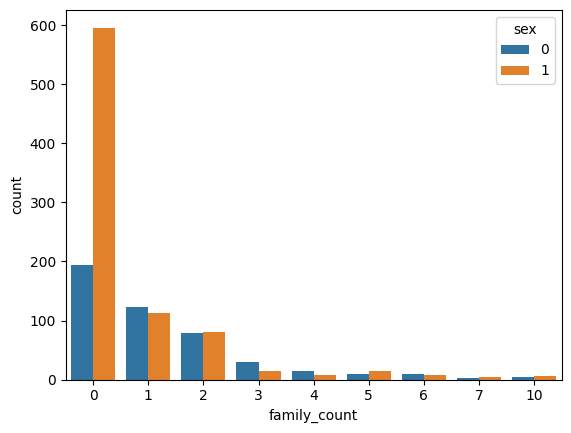

In [ ]:
sns.countplot(data=titanic,x='family_count',hue='sex')

**4.why teenagers are having high survaival rate which factor is playing vital role(fare,gender,family)**

<Axes: xlabel='age_group', ylabel='survived'>

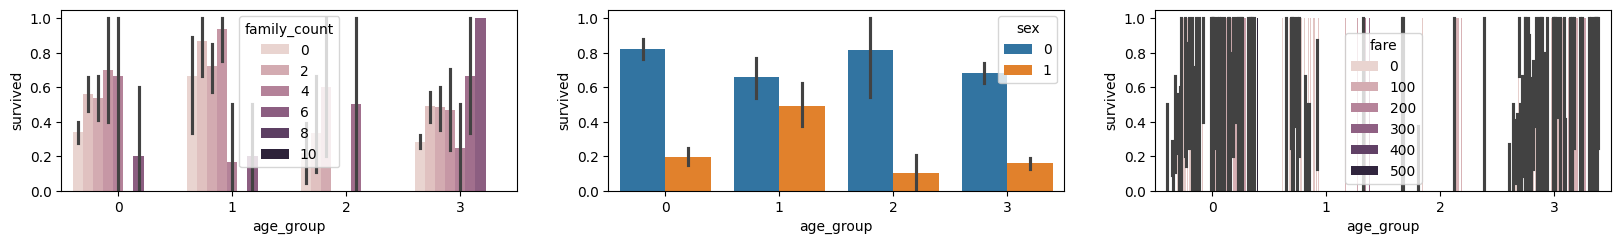

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(3,3,1)
sns.barplot(data=titanic,x='age_group',y='survived',hue='family_count')

plt.subplot(3,3,2)
sns.barplot(data=titanic,x='age_group',y='survived',hue='sex')

plt.subplot(3,3,3)
sns.barplot(data=titanic,x='age_group',y='survived',hue='fare')

**5.find the which are ages are considered as outliers**

<Axes: xlabel='age_group', ylabel='age'>

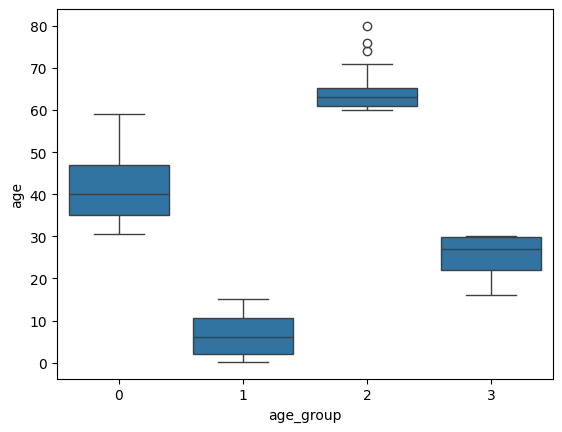

In [ ]:
# plt.figure(figsize=(30,30))
sns.boxplot(data=titanic,x='age_group',y='age')

**6.which passenger class has highest female count**


<Axes: xlabel='pclass', ylabel='count'>

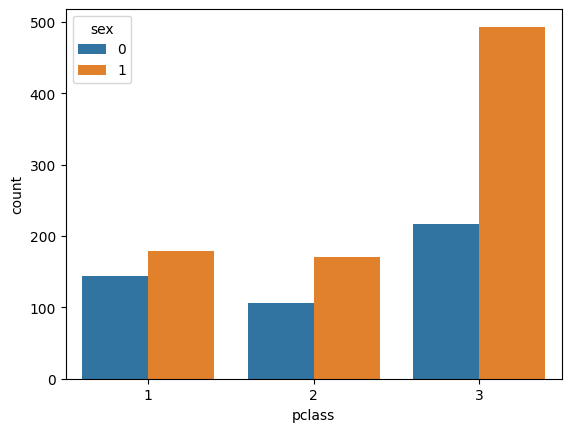

In [ ]:
sns.countplot(data=titanic,x='pclass',hue='sex')

**7.who paid more male or female**

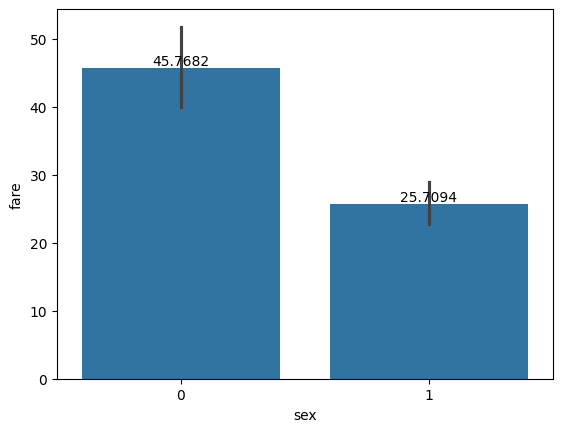

In [ ]:
a = sns.barplot(data=titanic,x='sex',y='fare')
for i in a.containers:
  a.bar_label(i)

**8.Teenagers are more in male or feamle gender**

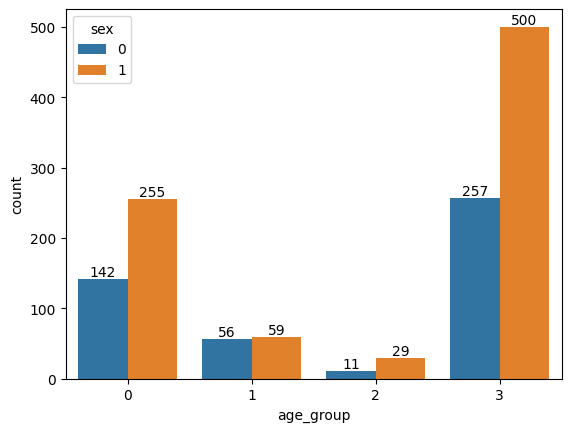

In [ ]:
a = sns.countplot(data=titanic,x='age_group',hue='sex')
for i in a.containers:
  a.bar_label(i)


**9.how many seniors are there in each pclass**

In [ ]:
df=titanic.groupby("age_group")["pclass"].value_counts()
df.loc[2]

,count
pclass,
1,26
2,8
3,6


**10.Find what are the different titles present**

In [ ]:
titanic['title'].unique()

array([' Mr', ' Master', ' Mrs', ' Miss', ' Col', ' Mme', ' Rev', ' Dr',
       ' Major', ' Capt', ' Sir', ' Lady', ' Mlle', ' Ms', ' Dona',
       ' Jonkheer', ' the Countess', ' Don'], dtype=object)

**11.show the no of families in each pclass**

<Axes: xlabel='pclass', ylabel='count'>

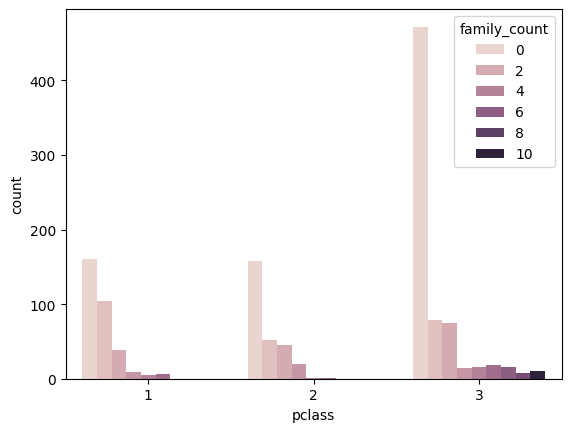

In [ ]:
df=titanic.groupby("pclass")
df['last_name'].count()
sns.countplot(data=titanic,x='pclass',hue='family_count')

**12.find which pclass has the highest family members**

In [ ]:
df=titanic.groupby("pclass")
df['family_count'].count()

,family_count
pclass,
1,323
2,277
3,709


**13.find the age group,if least no of passengers were embarked in cherbourg**

<Axes: xlabel='embarked', ylabel='count'>

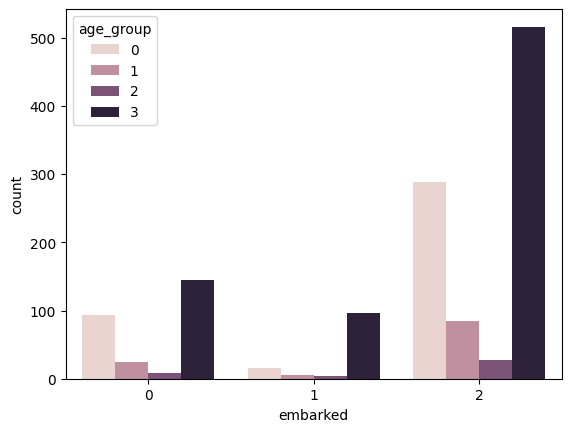

In [ ]:
sns.countplot(data=titanic,x='embarked',hue='age_group')


**14.find out the male and female count in each pclass**

In [ ]:
df=titanic.groupby("pclass")
df['sex'].value_counts()

pclass  sex
1       1      179
        0      144
2       1      171
        0      106
3       1      493
        0      216
Name: count, dtype: int64

**15.find the survival rate of male and female in each pclass**

In [ ]:
df=titanic.groupby("survived")
dff=df['sex'].mean()
dff.loc[1]

0.322

**16.find the male and female count in each age group**

In [ ]:
df=titanic.groupby("age_group")
df['sex'].value_counts()


age_group  sex
0          1      255
           0      142
1          1       59
           0       56
2          1       29
           0       11
3          1      500
           0      257
Name: count, dtype: int64

**17.find the survival rate of male and female in each age group**

In [ ]:
pd.pivot_table(titanic,index='age_group',columns='sex',values='survived',aggfunc=['mean'])

mean          
sex               0         1
age_group                    
0          0.823944  0.196078
1          0.660714  0.491525
2          0.818182  0.103448
3          0.684825  0.158000

**18.find the male and female count in each embarked**

In [ ]:
df=titanic.groupby("embarked")
df['sex'].value_counts()

embarked  sex
0         1      157
          0      113
1         1       63
          0       60
2         1      623
          0      293
Name: count, dtype: int64

**19.find the survival rate of male and female in each embarked**

In [ ]:
pd.pivot_table(titanic,index='embarked',columns='sex',values='survived',aggfunc=['mean'])

mean          
sex              0         1
embarked                    
0         0.902655  0.305732
1         0.616667  0.111111
2         0.682594  0.170144

**20.find the count and survival rate of male and female in teenagers**

In [ ]:
df=pd.pivot_table(titanic,index='age_group',columns='sex',values='survived',aggfunc=['count','mean'])
df.loc[3]

sex
count  0      257.000000
       1      500.000000
mean   0        0.684825
       1        0.158000
Name: 3, dtype: float64

**21.find the teenagers count and survival rate in each pclass**

In [ ]:
df=pd.pivot_table(titanic,index='age_group',columns='pclass',values='survived',aggfunc=['count','mean'])
df.loc[3]

pclass
count  1         120.000000
       2         144.000000
       3         493.000000
mean   1           0.641667
       2           0.381944
       3           0.249493
Name: 3, dtype: float64

Demographics and socioeconomic status played a significant role in survival during the Titanic disaster. Women, children, and those in higher passenger classes had a greater chance of survival. This aligns with historical accounts of the evacuation procedures and resource allocation on the ship.
